In [1]:
#### 
# File Name: Milestone3_RachelNewman.ipynb
# Author: Rachel Newman
# Class: DS 150
# This notebook is a copy of the Milestone 2 notebook that was previously submitted, but 
# with new additions.
####

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from datetime import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# This section of the code uploads the 2021 FARS fatal car accident dataset that I acquired 
# from the NHTSA database.I uploaded the dataset onto my github account and I will load it 
# into jupyter notebook from there
df = pd.read_csv('https://raw.githubusercontent.com/rachek253/fatal-car-crashes-2021/main/accident.csv',
                encoding_errors = 'replace')
# There was a row that had values that weren't in the form of UTF-8, so the 
# encoding_errors = 'replace' just replaces it with a ? character, which can then be dropped
# from the dataset. 
df.head(50)

,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001,0,0,2,2,0,3,3,...,13,22,10:00pm-10:59pm,25,25,23,11:00pm-11:59pm,2,2,2
1,1,Alabama,10002,0,0,1,1,0,2,2,...,Unknown,19,7:00pm-7:59pm,9,9,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),2
2,1,Alabama,10003,1,1,1,1,0,1,1,...,29,9,9:00am-9:59am,40,40,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
3,1,Alabama,10004,0,0,1,1,0,1,1,...,20,16,4:00pm-4:59pm,28,28,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
4,1,Alabama,10005,0,0,2,2,0,4,4,...,20,22,10:00pm-10:59pm,30,30,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
5,1,Alabama,10006,0,0,3,3,0,3,3,...,17,12,12:00pm-12:59pm,23,23,12,12:00pm-12:59pm,53,53,1
6,1,Alabama,10007,0,0,1,1,0,1,1,...,30,22,10:00pm-10:59pm,54,54,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
7,1,Alabama,10008,0,0,2,2,0,2,2,...,44,2,2:00am-2:59am,51,51,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1
8,1,Alabama,10009,0,0,1,1,0,2,2,...,Unknown,1,1:00am-1:59am,0,0,99,Unknown,99,Unknown EMS Hospital Arrival Time,1
9,1,Alabama,10010,0,0,3,3,0,3,3,...,1,0,0:00am-0:59am,15,15,99,Unknown,99,Unknown EMS Hospital Arrival Time,1


In [4]:
# I want to see what the 80 columns in the dataset are named. I will drop any columns that
# I won't need for my project in the next cell. 
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL',
       'VE_FORMS', 'PVH_INVL', 'PERSONS', 'PERMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'MONTH', 'MONTHNAME', 'DAY', 'DAYNAME', 'DAY_WEEK',
       'DAY_WEEKNAME', 'YEAR', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'TWAY_ID', 'TWAY_ID2', 'ROUTE', 'ROUTENAME', 'RUR_URB', 'RUR_URBNAME',
       'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME', 'NHS',
       'NHSNAME', 'SP_JUR', 'SP_JURNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE',
       'LATITUDENAME', 'LONGITUD', 'LONGITUDNAME', 'HARM_EV', 'HARM_EVNAME',
       'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2',
       'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOUR', 'ARR_HOURNAME',
       'ARR_M

In [5]:
df_columns = ['STATE', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PERMVIT', 'RD_OWNER', 
           'RD_OWNERNAME', 'NHS', 'NHSNAME', 'SP_JUR', 'SP_JURNAME', 'MILEPT', 'MILEPTNAME', 
           'LATITUDE','LATITUDENAME', 'LONGITUD', 'LONGITUDNAME', 'RAILNAME', 'NOT_HOUR', 
           'NOT_HOURNAME', 'NOT_MIN', 'NOT_MINNAME', 'ARR_HOURNAME', 'ARR_MINNAME',
           'HOSP_HR', 'HOSP_HRNAME', 'HOSP_MN','HOSP_MNNAME', 'SCH_BUSNAME', 'WEATHER', 
           'MAN_COLL', 'RELJCT1', 'RELJCT2', 'ST_CASE', 'SP_JUR', 'SP_JURNAME', 'DAYNAME', 
           'DAY_WEEK', 'DAY_WEEKNAME', 'MINUTENAME', 'HOURNAME', 'CITY', 'CITYNAME', 'RUR_URB',
           'TWAY_ID', 'TWAY_ID2', 'MONTHNAME']

df = df.drop(df_columns, axis = 1)

In [6]:
df

,STATENAME,PEDS,PERSONS,COUNTY,COUNTYNAME,MONTH,DAY,YEAR,HOUR,MINUTE,...,WRK_ZONE,WRK_ZONENAME,LGT_COND,LGT_CONDNAME,WEATHERNAME,SCH_BUS,RAIL,ARR_HOUR,ARR_MIN,FATALS
0,Alabama,0,3,115,ST. CLAIR (115),2,12,2021,22,10,...,0,NaN,2,Dark - Not Lighted,Rain,0,0000000,22,25,2
1,Alabama,0,2,73,JEFFERSON (73),2,11,2021,18,0,...,0,NaN,2,Dark - Not Lighted,Rain,0,0000000,19,9,2
2,Alabama,1,1,73,JEFFERSON (73),2,7,2021,0,20,...,0,NaN,2,Dark - Not Lighted,Rain,0,0000000,9,40,1
3,Alabama,0,1,117,SHELBY (117),2,3,2021,16,20,...,0,NaN,1,Daylight,Clear,0,0000000,16,28,1
4,Alabama,0,4,73,JEFFERSON (73),1,30,2021,22,20,...,0,NaN,2,Dark - Not Lighted,Cloudy,0,0000000,22,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,Wyoming,0,2,19,JOHNSON (19),11,27,2021,9,2,...,0,NaN,1,Daylight,Clear,0,0000000,9,16,1
39504,Wyoming,0,2,3,BIG HORN (3),12,14,2021,18,0,...,0,NaN,2,Dark - Not Lighted,Clear,0,0000000,19,3,1
39505,Wyoming,0,1,37,SWEETWATER (37),12,15,2021,10,34,...,0,NaN,1,Daylight,Clear,0,0000000,99,99,1
39506,Wyoming,1,1,21,LARAMIE (21),12,19,2021,17,9,...,0,NaN,2,Dark - Not Lighted,Clear,0,0000000,17,17,1


After dropping columns that will not be used for my preliminary analysis it's much easier to look at the dataframe. The next step for my analysis will be to get some basic information about the columns and I will do some basic plots to get a better understanding of my data. Later on, I will combine columns (specifically my date columns for plotting), and then I will move onto my exploratory analysis and making my predictions.

In [7]:
df.describe()

,PEDS,PERSONS,COUNTY,MONTH,DAY,YEAR,HOUR,MINUTE,ROUTE,FUNC_SYS,HARM_EV,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,SCH_BUS,ARR_HOUR,ARR_MIN,FATALS
count,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.0,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000,39508.000000
mean,0.231244,2.217551,93.100992,6.781816,15.584489,2021.0,13.616508,29.140225,3.791840,4.354105,17.786423,1.678698,2.393692,0.052344,1.962261,0.002556,62.397919,69.636327,1.086843
std,0.473013,1.845716,99.379705,3.330738,8.863963,0.0,10.239139,18.379085,2.174426,7.431816,13.878324,5.637808,5.326200,0.408473,1.207073,0.050497,42.608196,35.856315,0.354078
min,0.000000,0.000000,1.000000,1.000000,1.000000,2021.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,31.000000,4.000000,8.000000,2021.0,7.000000,14.000000,2.000000,3.000000,8.000000,1.000000,1.000000,0.000000,1.000000,0.000000,16.000000,35.000000,1.000000
50%,0.000000,2.000000,71.000000,7.000000,16.000000,2021.0,14.000000,30.000000,3.000000,4.000000,12.000000,1.000000,1.000000,0.000000,2.000000,0.000000,99.000000,98.000000,1.000000
75%,0.000000,3.000000,115.000000,10.000000,23.000000,2021.0,19.000000,44.000000,6.000000,5.000000,26.000000,1.000000,4.000000,0.000000,3.000000,0.000000,99.000000,99.000000,1.000000
max,11.000000,133.000000,999.000000,12.000000,31.000000,2021.0,99.000000,99.000000,9.000000,99.000000,99.000000,99.000000,99.000000,4.000000,9.000000,1.000000,99.000000,99.000000,13.000000


In [8]:
fatal_total = sum(df['FATALS'])
print(f'The total number of fatalities in car accidents in 2021: {fatal_total} deaths')

The total number of fatalities in car accidents in 2021: 42939 deaths


In [9]:
# This section of the code creates a new column, 'DATE' that creates a single date column to
# be used in plotting various things! I used datetime to convert the 'YEAR', 'MONTH', and
# 'DAY' columns into a single column :)
df['DATE'] = df.apply(lambda row:f'{row["YEAR"]}-{row["MONTH"]:0>2}-{row["DAY"]}',axis = 1)
df['DATE'] = df.apply(lambda row: dt.strptime(row['DATE'], '%Y-%m-%d'), axis = 1)

In [10]:
df

,STATENAME,PEDS,PERSONS,COUNTY,COUNTYNAME,MONTH,DAY,YEAR,HOUR,MINUTE,...,WRK_ZONENAME,LGT_COND,LGT_CONDNAME,WEATHERNAME,SCH_BUS,RAIL,ARR_HOUR,ARR_MIN,FATALS,DATE
0,Alabama,0,3,115,ST. CLAIR (115),2,12,2021,22,10,...,NaN,2,Dark - Not Lighted,Rain,0,0000000,22,25,2,2021-02-12
1,Alabama,0,2,73,JEFFERSON (73),2,11,2021,18,0,...,NaN,2,Dark - Not Lighted,Rain,0,0000000,19,9,2,2021-02-11
2,Alabama,1,1,73,JEFFERSON (73),2,7,2021,0,20,...,NaN,2,Dark - Not Lighted,Rain,0,0000000,9,40,1,2021-02-07
3,Alabama,0,1,117,SHELBY (117),2,3,2021,16,20,...,NaN,1,Daylight,Clear,0,0000000,16,28,1,2021-02-03
4,Alabama,0,4,73,JEFFERSON (73),1,30,2021,22,20,...,NaN,2,Dark - Not Lighted,Cloudy,0,0000000,22,30,1,2021-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,Wyoming,0,2,19,JOHNSON (19),11,27,2021,9,2,...,NaN,1,Daylight,Clear,0,0000000,9,16,1,2021-11-27
39504,Wyoming,0,2,3,BIG HORN (3),12,14,2021,18,0,...,NaN,2,Dark - Not Lighted,Clear,0,0000000,19,3,1,2021-12-14
39505,Wyoming,0,1,37,SWEETWATER (37),12,15,2021,10,34,...,NaN,1,Daylight,Clear,0,0000000,99,99,1,2021-12-15
39506,Wyoming,1,1,21,LARAMIE (21),12,19,2021,17,9,...,NaN,2,Dark - Not Lighted,Clear,0,0000000,17,17,1,2021-12-19


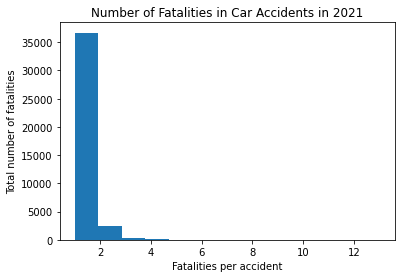

In [11]:
# As part of my preliminary analysis of my data, I decided to create a histogram for the 
# number of fatalities. As you can see, most of the fatal car accidents in 2021 involved 
# only a singular death. The plot stretches out to 12 because there was a single accident in
# 2021 that resulted in 13 fatalities.
fig, ax = plt.subplots()
ax.hist(df['FATALS'], bins = 13)
ax.set_title('Number of Fatalities in Car Accidents in 2021')
ax.set_xlabel('Fatalities per accident')
ax.set_ylabel('Total number of fatalities');

In [12]:
# This section creates a separate DataFrame, titled 'county_name' that records the number of
# fatalities in the top 20 counties. This is not adjusted by population per county, and
# instead counts the number of fatalities per county. For reference, Roman helped me with 
# this section because I was looking for a way to examine whether there were counties that
# had a significant number of fatal accidents. 
countynames = pd.DataFrame(df['FATALS'].groupby(df['COUNTYNAME']).sum().sort_values(ascending = False)[:20])
countynames.index

Index(['LOS ANGELES (37)', 'MARICOPA (13)', 'HARRIS (201)', 'COOK (31)',
       'SAN BERNARDINO (71)', 'DALLAS (113)', 'MIAMI-DADE (86)',
       'SAN DIEGO (73)', 'RIVERSIDE (65)', 'BROWARD (11)', 'HILLSBOROUGH (57)',
       'SHELBY (157)', 'BEXAR (29)', 'CLARK (3)', 'TARRANT (439)',
       'WAYNE (163)', 'ORANGE (95)', 'PALM BEACH (99)', 'KERN (29)',
       'SACRAMENTO (67)'],
      dtype='object', name='COUNTYNAME')

In [13]:
countynames

,FATALS
COUNTYNAME,
LOS ANGELES (37),813
MARICOPA (13),596
HARRIS (201),576
COOK (31),458
SAN BERNARDINO (71),402
DALLAS (113),354
MIAMI-DADE (86),352
SAN DIEGO (73),315
RIVERSIDE (65),300


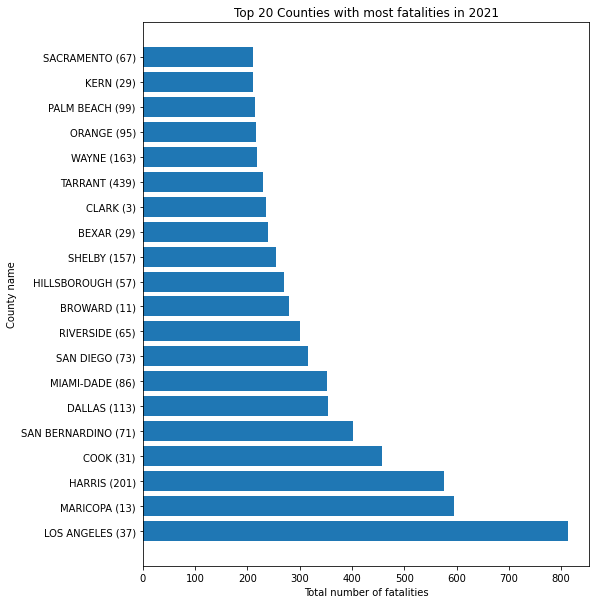

In [14]:
# This is the bar plot for the top 20 counties that had the most recorded fatalities in 2021
fig,ax = plt.subplots(figsize = (8,10))
ax.barh(countynames.index, countynames['FATALS'])
ax.set_title('Top 20 Counties with most fatalities in 2021')
ax.set_xlabel('Total number of fatalities')
ax.set_ylabel('County name');

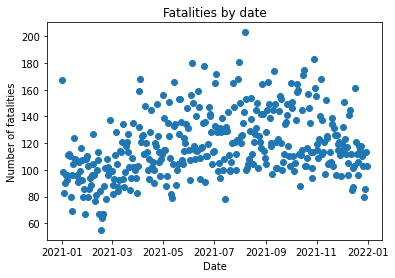

In [15]:
# This section of my code creates a dataframe of the fatal car crashes by date. I will fit a 
# quadratic curve to the data.
fataldate = pd.DataFrame(df['FATALS'].groupby(df['DATE']).sum().sort_values(ascending = False))
fig,ax = plt.subplots()
ax.scatter(fataldate.index, fataldate['FATALS'])
ax.set_title('Fatalities by date')
ax.set_xlabel('Date')
ax.set_ylabel('Number of fatalities');

In [26]:
# This section of the code creates a new column in the fataldate dataframe and then encodes
# it as a numeric variable to be used later. 
encoder_date = LabelEncoder()

fataldate['DATES'] = fataldate.index
columns = ['DATES']
encoded_fataldate = fataldate.copy()
for col in columns:
    encoded_fataldate[col] = encoder_date.fit_transform(fataldate[col])
encoded_fataldate

,FATALS,DATES
DATE,,
2021-08-07,203,218
2021-10-29,183,301
2021-07-31,181,211
2021-06-05,180,155
2021-06-19,178,169
...,...,...
2021-02-19,67,49
2021-02-18,67,48
2021-01-28,67,27


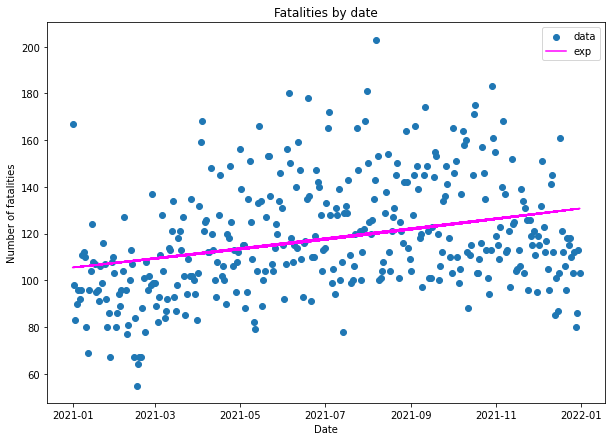

In [27]:
def exponential_func(x,a,b):
    return(a*b**x)
param,_ = curve_fit(exponential_func,encoded_fataldate['DATES'],fataldate['FATALS'])
preds_exp = exponential_func(encoded_fataldate['DATES'],*param)
# preds_exp = [exponential_func(fatals,*param) for fatals in fataldate['FATALS']]
fig,ax = plt.subplots(figsize = (10,7))
ax.scatter(fataldate.index, fataldate['FATALS'], label = 'data')
ax.plot(fataldate.index, preds_exp, label = 'exp', c = '#FF00FF')
ax.legend();
ax.set_title('Fatalities by date')
ax.set_xlabel('Date')
ax.set_ylabel('Number of fatalities');

The above figure is inaccurate. When encoding the dates so they could be used to create an exponential curve to fit to the data (because it looks like there is an exponential relationship between the date and the number of fatalities based off of how the scatter plot is presented), I think I may have made a mistake in encoding the dates to numerical data. I could not figure out a way to get the exponential function to work with 'Timestamp' data without it proceeding to give me an error when running the cell. I tried to do this, but if you know of a better way of creating this curve (perhaps with logistic regression?), please let me know!

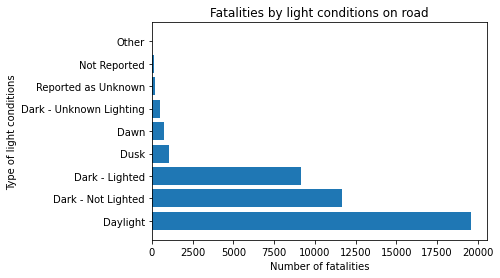

In [28]:
# This section of the code examines fatalities versus light conditions. I repeat the same 
# steps as above in creating a separate dataframe with the two things I need!
lgtcondFatals = pd.DataFrame(df['FATALS'].groupby(df['LGT_CONDNAME']).sum().sort_values(ascending = False))
lgtcondFatals
fig,ax = plt.subplots()
ax.barh(lgtcondFatals.index, lgtcondFatals['FATALS'])
ax.set_title('Fatalities by light conditions on road')
ax.set_xlabel('Number of fatalities')
ax.set_ylabel('Type of light conditions');

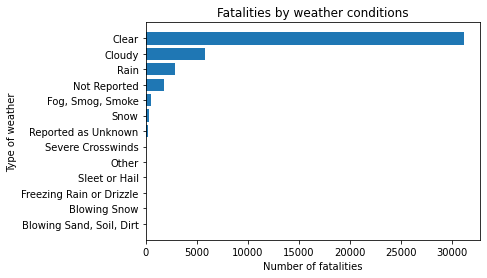

In [29]:
# This section of the code investigates fatalities during different weather conditions. I
# just do the same thing as above in the previous cells to create a new dataframe. Most of 
# the fatalities occur during clear skies
weathercondFatals = pd.DataFrame(df['FATALS'].groupby(df['WEATHERNAME']).sum().sort_values())
weathercondFatals
fig,ax = plt.subplots()
ax.barh(weathercondFatals.index, weathercondFatals['FATALS'])
ax.set_title('Fatalities by weather conditions')
ax.set_xlabel('Number of fatalities')
ax.set_ylabel('Type of weather');

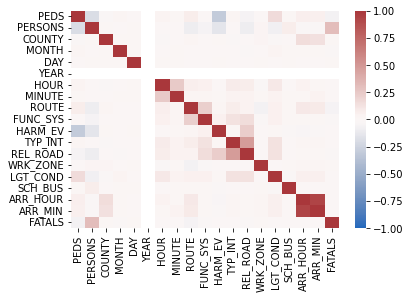

In [30]:
# In this part of my preliminary analysis, I am looking for any values that either correlate
# positively or negatively with FATALS to have an idea on what would be good for making
# predictions on the target variable (which is FATALS).
sns.heatmap(df.corr(numeric_only = True), vmin = -1, vmax = 1, cmap = 'vlag');

The heatmap above shows that not a lot of variables in the data frame have any sort of correlation with FATALS. Nevertheless, I am still going to investigate a number of features I outlined in Milestone 1 to see if they can predict the number of fatalities. I think the issue here is that FATALS records the number of deaths per accident, and there is no data within this set om just car crashes.

In [31]:
# This section of the code encodes the feature variables data into categorical data. This 
# section fixes the error that was previously in the cell below, in which the error was a 
# TypeError: float() argument must be a string or a number, not 'Timestamp'. To clarify, I 
# had to do some googling and I found a source (referenced in report) that had a similar
# issue and used these commands to fix it! I just changed it to fit my needs :)
encoder = LabelEncoder()
columns = ['DATE', 'COUNTYNAME', 'WEATHERNAME', 'ROUTE', 'PERSONS', 'LGT_CONDNAME', 
           'WRK_ZONE', 'PEDS']
encoded_df = df.copy()
for col in columns:
    encoded_df[col] = encoder.fit_transform(df[col])
encoded_df.head()

,STATENAME,PEDS,PERSONS,COUNTY,COUNTYNAME,MONTH,DAY,YEAR,HOUR,MINUTE,...,WRK_ZONENAME,LGT_COND,LGT_CONDNAME,WEATHERNAME,SCH_BUS,RAIL,ARR_HOUR,ARR_MIN,FATALS,DATE
0,Alabama,0,3,115,2293,2,12,2021,22,10,...,NaN,2,1,8,0,0000000,22,25,2,42
1,Alabama,0,2,73,1186,2,11,2021,18,0,...,NaN,2,1,8,0,0000000,19,9,2,41
2,Alabama,1,1,73,1186,2,7,2021,0,20,...,NaN,2,1,8,0,0000000,9,40,1,37
3,Alabama,0,1,117,2234,2,3,2021,16,20,...,NaN,1,4,2,0,0000000,16,28,1,33
4,Alabama,0,4,73,1186,1,30,2021,22,20,...,NaN,2,1,3,0,0000000,22,30,1,29


In [32]:
# This section is still being debugged and does not currently function. I am still working
# on creating my model to make predictions of my target variable
features = ['DATE', 'COUNTYNAME', 'WEATHERNAME', 'ROUTE', 'PERSONS', 'LGT_CONDNAME', 
           'WRK_ZONE', 'PEDS']
target = ['FATALS']
x_tr,x_te,y_tr,y_te = train_test_split(encoded_df[features], df[target], test_size = 0.2,
                                      random_state = 0)
x_tr,x_va,y_tr,y_va = train_test_split(x_tr, y_tr, test_size = 0.25, 
                                      random_state = 0)
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_tr,y_tr)
clf.score(x_va,y_va)

0.8709187547456341

[Text(0.5255556959117618, 0.9893617021276596, 'PERSONS <= 2.5\ngini = 0.137\nsamples = 23704\nvalue = [21971, 1453, 225, 39, 12, 3, 1]'),
 Text(0.15427175418377567, 0.9680851063829787, 'PERSONS <= 1.5\ngini = 0.055\nsamples = 16683\nvalue = [16209, 467, 5, 2, 0, 0, 0]'),
 Text(0.013262245885722678, 0.9468085106382979, 'PEDS <= 1.5\ngini = 0.008\nsamples = 9992\nvalue = [9952, 38, 2, 0, 0, 0, 0]'),
 Text(0.006204559478700669, 0.925531914893617, 'PEDS <= 0.5\ngini = 0.002\nsamples = 9830\nvalue = [9822, 8, 0, 0, 0, 0, 0]'),
 Text(0.005708194720404615, 0.9042553191489362, 'gini = 0.0\nsamples = 6254\nvalue = [6254, 0, 0, 0, 0, 0, 0]'),
 Text(0.006700924236996722, 0.9042553191489362, 'COUNTYNAME <= 2308.5\ngini = 0.004\nsamples = 3576\nvalue = [3568, 8, 0, 0, 0, 0, 0]'),
 Text(0.003970918066368428, 0.8829787234042553, 'ROUTE <= 6.5\ngini = 0.002\nsamples = 3226\nvalue = [3222, 4, 0, 0, 0, 0, 0]'),
 Text(0.001985459033184214, 0.8617021276595744, 'COUNTYNAME <= 157.0\ngini = 0.001\nsamples =

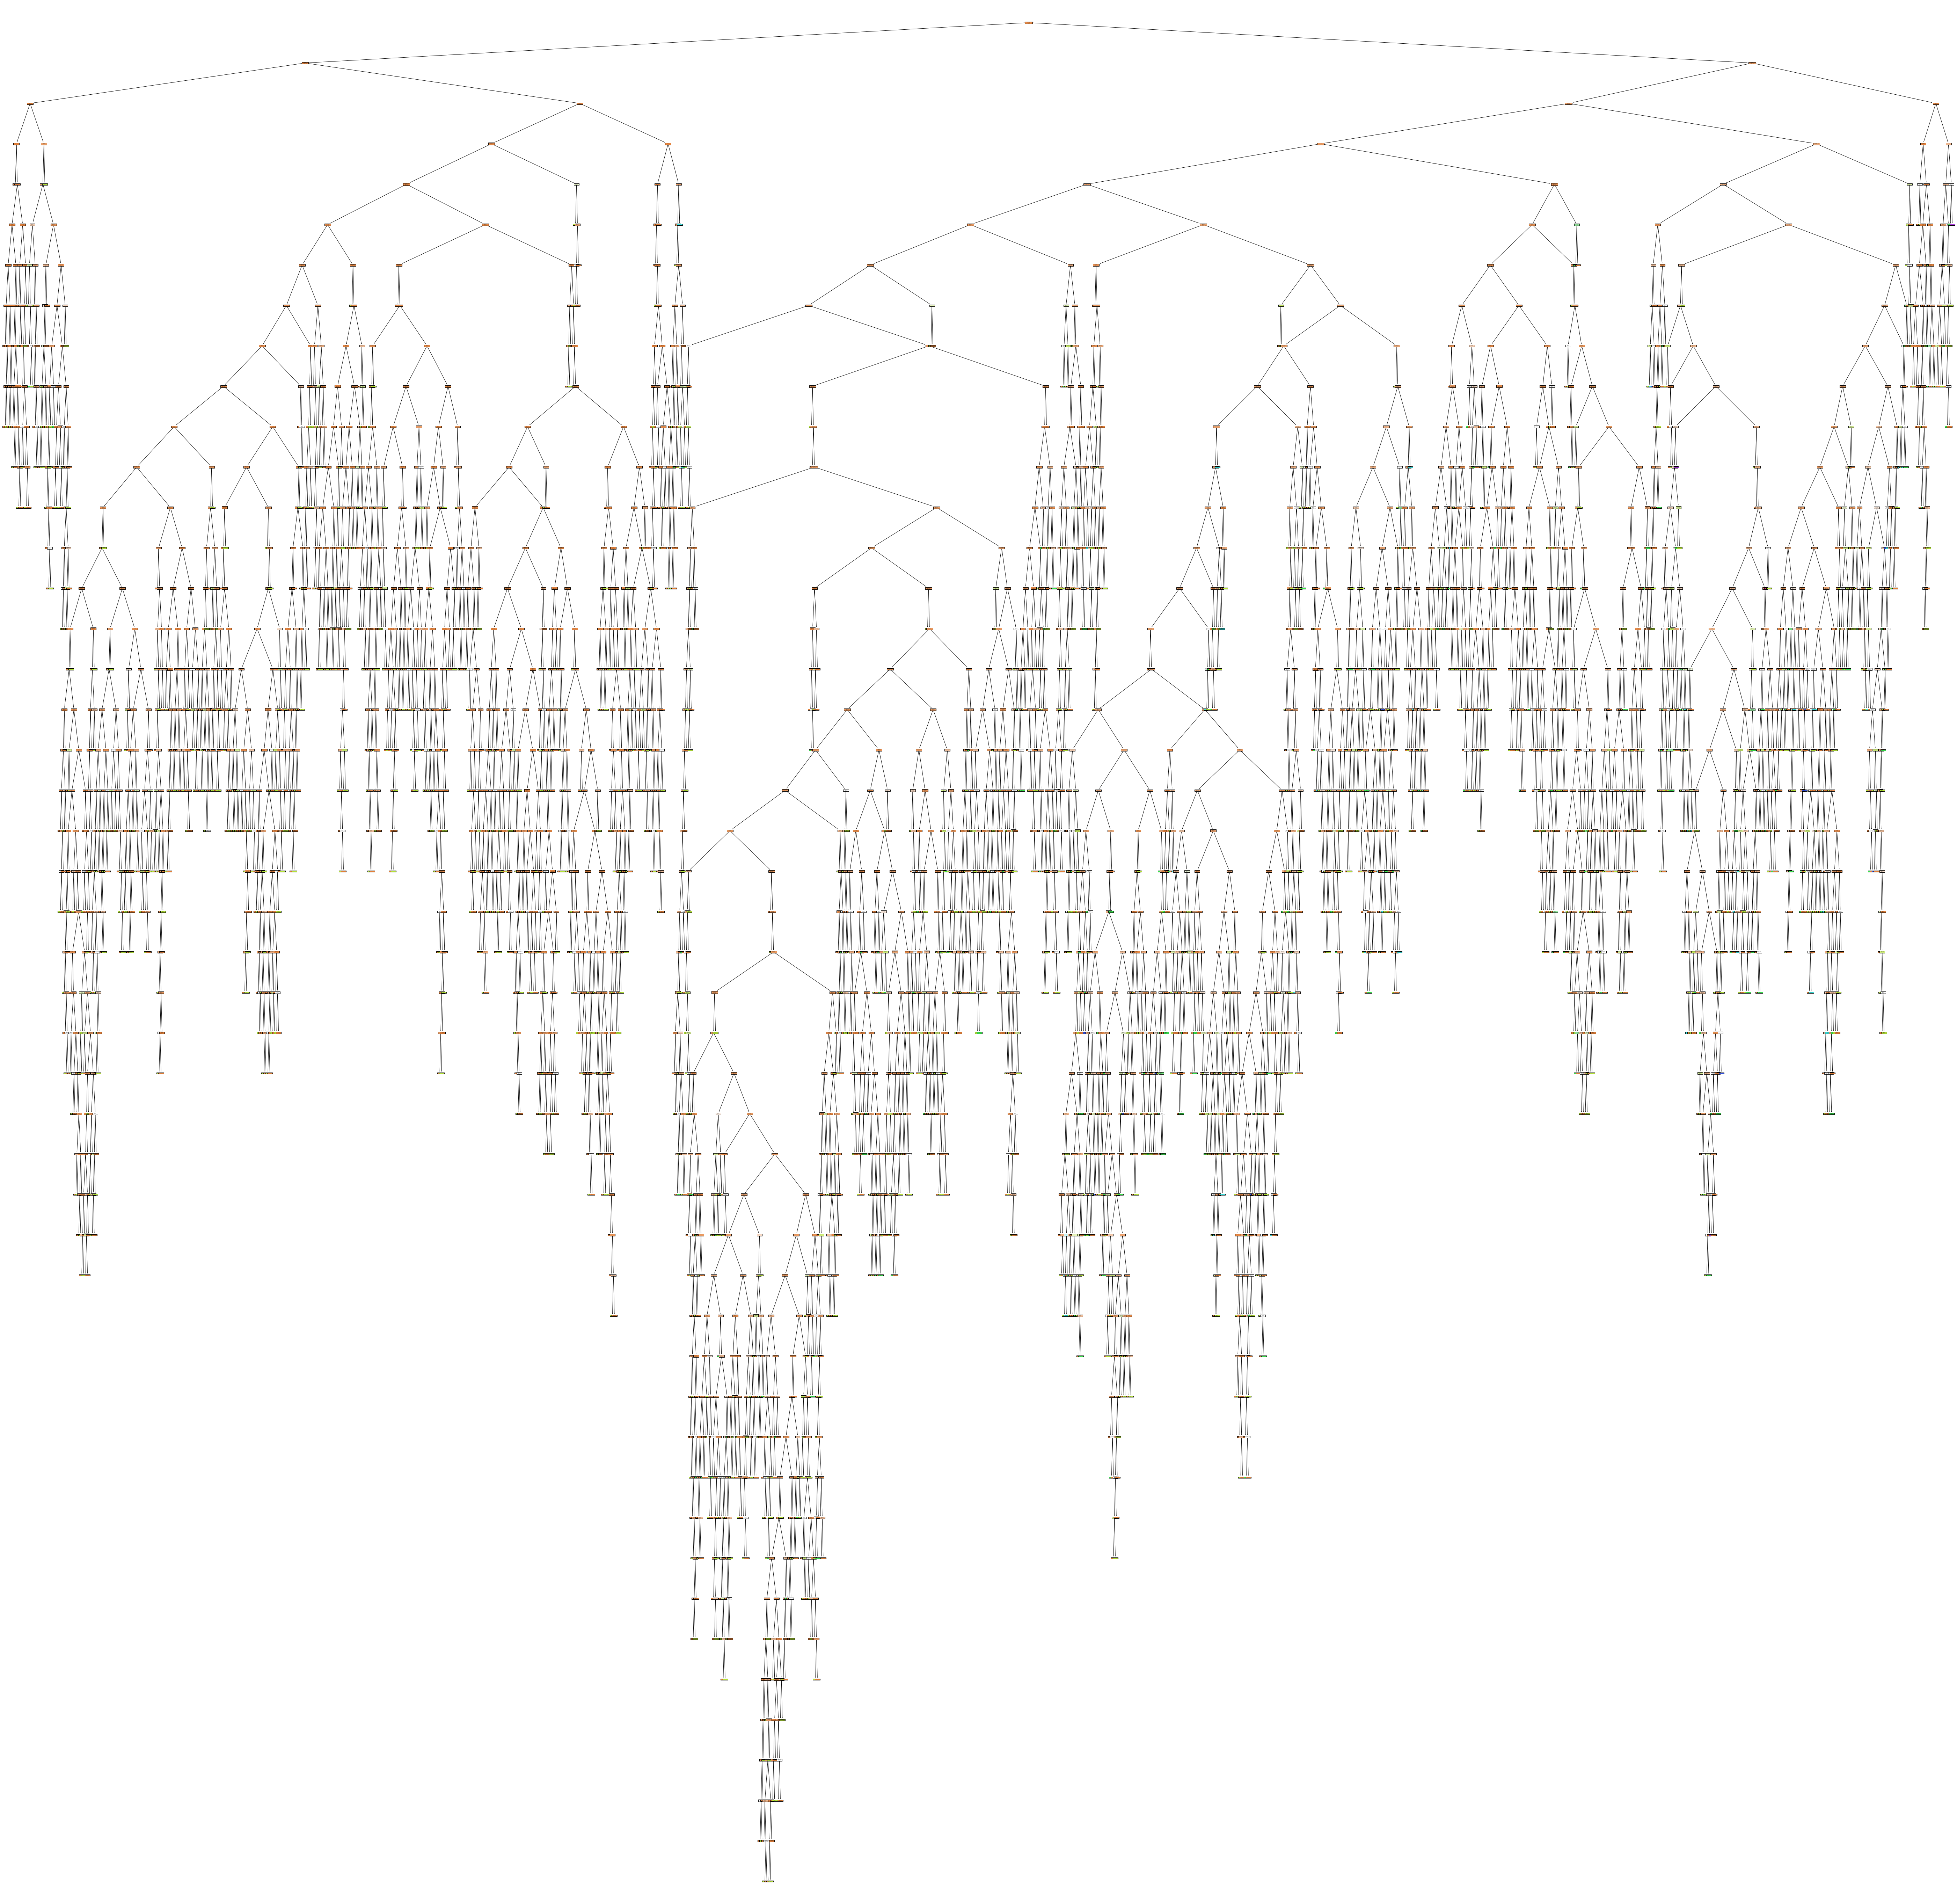

In [25]:
fig,ax = plt.subplots(figsize = (100,100))
decision_classifier = plot_tree(clf, filled = True, feature_names = features);
decision_classifier

The above cell plots the tree in its full length! I was curious to see what it looked like, so I decided to plot it. It is not a useful plot because the tree has so many branches, it is very hard to see what the classifiers are due to the depth of the tree. I am going to keep this in here because it is kind of cool, but this image will not be used in Milestone 3 or the final presentation of this project!

In [33]:
clf.get_depth()

46

In [34]:
# let's optimize on both criterion and max_depth simultaneously
# use gini and entropy for criteria
# let's find out how deep an entropy tree goes if we don't constrain its depth
clf = DecisionTreeClassifier(random_state = 0, criterion = 'entropy')
clf.fit(x_tr,y_tr)
accs = {'gini': {'tr':[],'va':[]},
        'entropy': {'tr':[],'va':[]}}
for depth in range(1,47): # let max_depth range from 1 to 46 inclusive.
    for crit in ['gini','entropy']:
        clf = DecisionTreeClassifier(max_depth = depth, criterion = crit)
        clf.fit(x_tr,y_tr)
        accs[crit]['tr'].append(clf.score(x_tr,y_tr))
        accs[crit]['va'].append(clf.score(x_va,y_va))

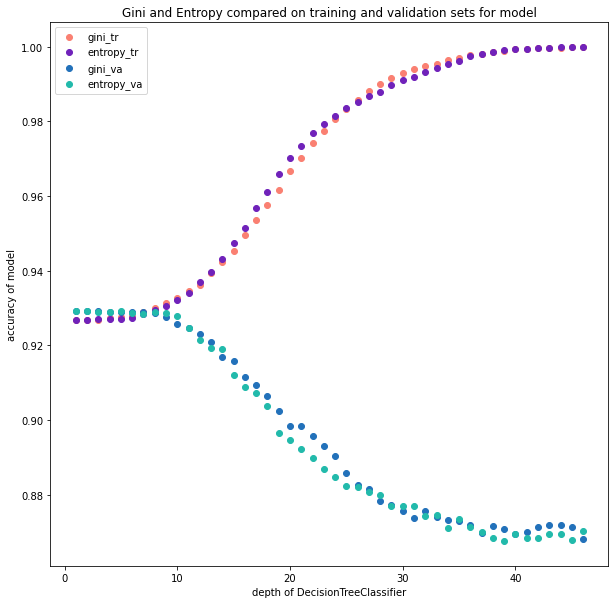

In [39]:
xs = range(1,47)
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(xs, accs['gini']['tr'], label = 'gini_tr', color = '#FA8072')
ax.scatter(xs, accs['entropy']['tr'], label = 'entropy_tr', color = '#7022ba')
ax.scatter(xs, accs['gini']['va'], label = 'gini_va', color = '#2271ba')
ax.scatter(xs, accs['entropy']['va'], label = 'entropy_va', color = '#22baab')
ax.set_title('Gini and Entropy compared on training and validation sets for model')
ax.set_xlabel('depth of DecisionTreeClassifier')
ax.set_ylabel('accuracy of model')
ax.legend();

The above plot depicts the accuracy of both the gini and entropy decision trees at each depth of the tree on both the training and validation sets! As we can see, the more layers in the tree for the training set, the more accurate it becomes, but the more layers that are added to the tree for the validation set, the accuracy decreases. From this, it seems that on the validation set for both the gini and entropy, the ideal depth for the decision tree should be around 10 or 11 layers.

In [37]:
new_tree = DecisionTreeClassifier(random_state = 0, max_depth = 10)
new_tree.fit(x_tr, y_tr)
new_tree.score(x_va, y_va)

0.9257150088585169

In [38]:
new_tree.score(x_te, y_te)

0.9281194634269805

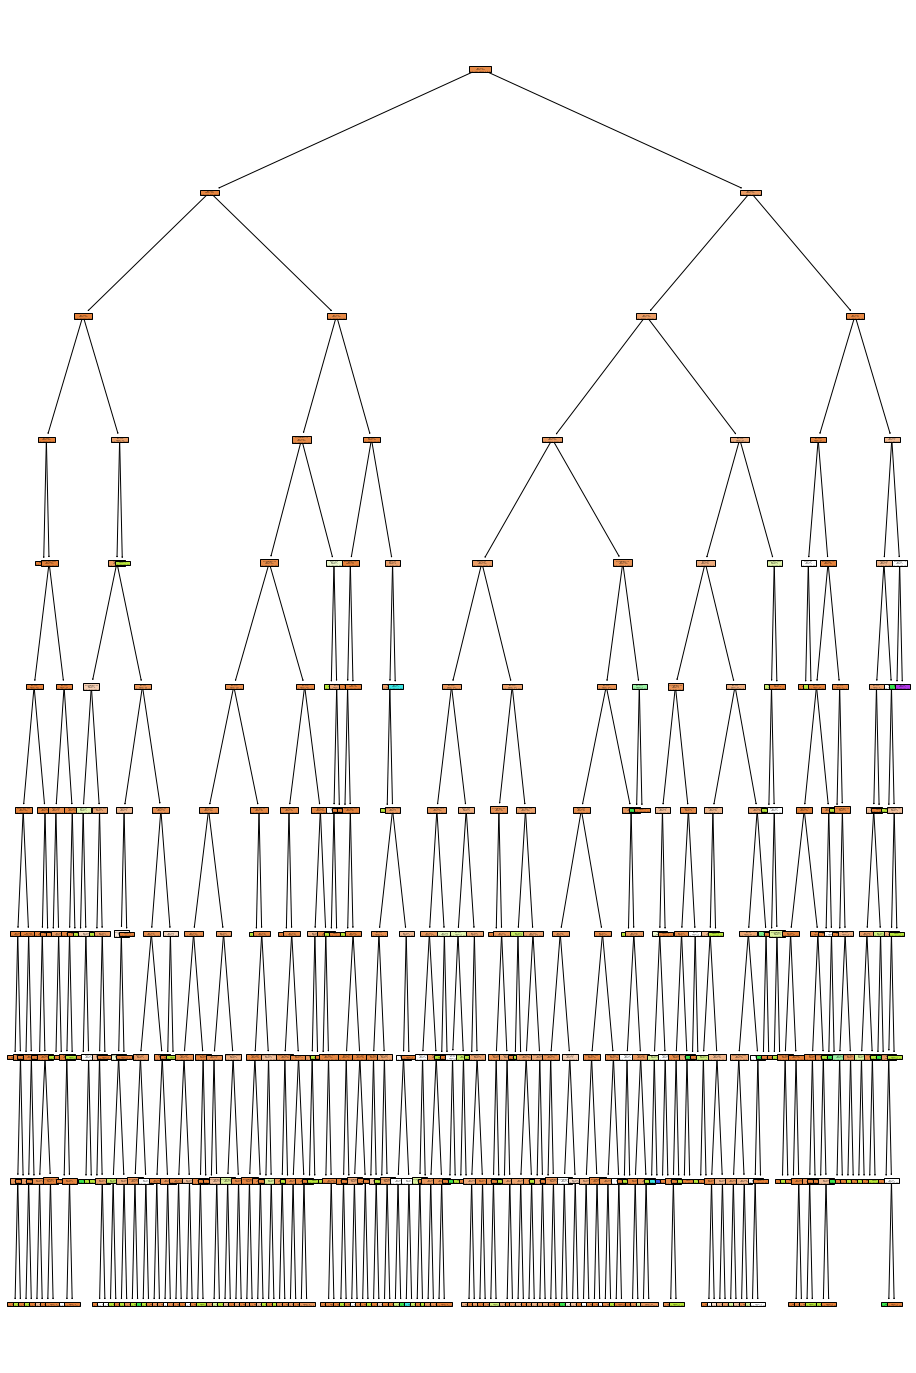

In [74]:
fig, ax = plt.subplots(figsize = (16,25))
plot_tree(new_tree, filled = True, feature_names = features);